In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
mall_data=pd.read_csv("Mall_Customers.csv")

In [77]:
mall_data.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [79]:
mall_data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [83]:
mall_data.columns=["custId","Gender","Age","Income","Spend"]

In [85]:
seg_data=mall_data.iloc[:,1:]

In [87]:
from sklearn.preprocessing import LabelEncoder

In [89]:
lc=LabelEncoder()
gender=lc.fit_transform(seg_data["Gender"])

In [91]:
seg_data.drop("Gender",axis=1,inplace=True)

In [95]:
seg_data["Gender"]=gender

In [97]:
seg_data

,Age,Income,Spend,Gender
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,0
196,45,126,28,0
197,32,126,74,1
198,32,137,18,1


In [101]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled_data=sc.fit_transform(seg_data)

In [99]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [109]:
norm_z=linkage(seg_data,method='complete',metric='euclidean')

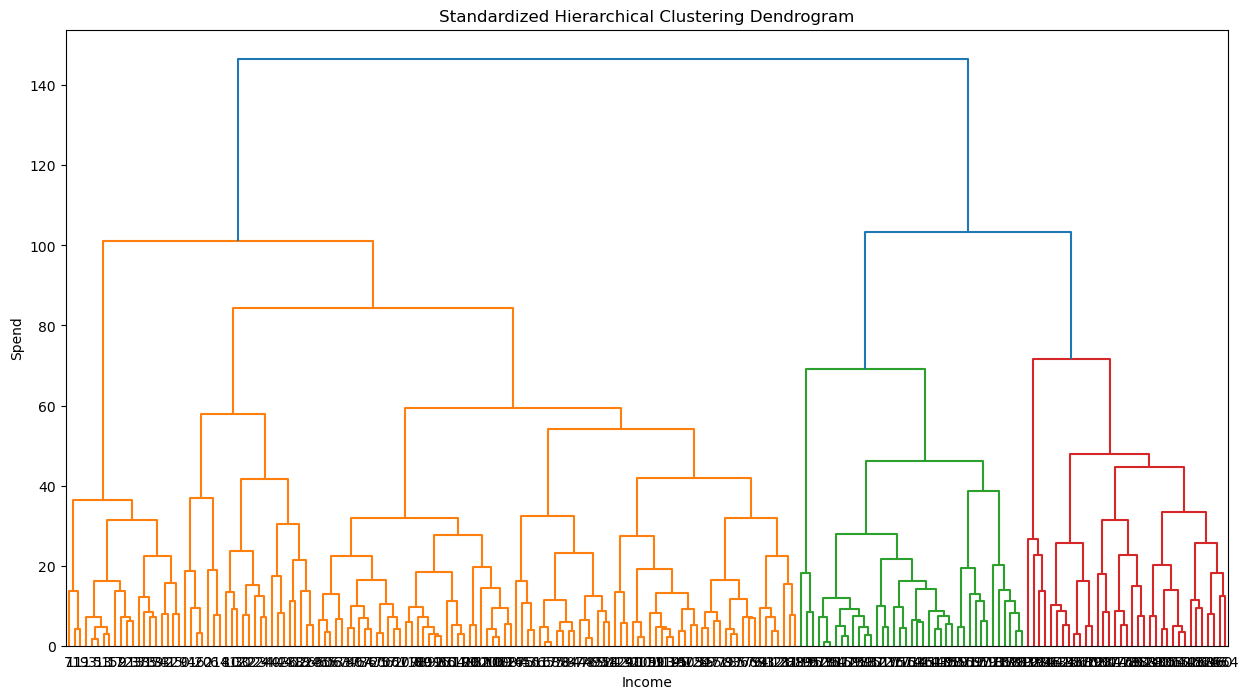

In [113]:
plt.figure(figsize=(15, 8));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Income');plt.ylabel('Spend')
sch.dendrogram(norm_z, 
    leaf_rotation = 0,  # rotates the x axis labels
    leaf_font_size = 10 # font size for the x axis labels
)
plt.show()

In [117]:
hierarical_clustering=AgglomerativeClustering(n_clusters=3,linkage='complete',metric='euclidean').fit(seg_data)
hierarical_clustering.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int64)

In [125]:
cluster_labels=pd.Series(hierarical_clustering.labels_)
seg_data['clust']=cluster_labels
mall_data['clust']=cluster_labels

In [127]:
seg_data

,Age,Income,Spend,Gender,clust
0,19,15,39,1,0
1,21,15,81,1,0
2,20,16,6,0,0
3,23,16,77,0,0
4,31,17,40,0,0
...,...,...,...,...,...
195,35,120,79,0,2
196,45,126,28,0,1
197,32,126,74,1,2
198,32,137,18,1,1


"for label in np.unique(hierarical_clustering.labels_):\n    cluster_points = seg_data[seg_data['clust'] == label]\n    center = cluster_points.mean(axis=0)\n    radius = np.max(np.linalg.norm(cluster_points - center, axis=1))\n    \n    circle = plt.Circle(center, radius + 0.1, color='black', fill=False, linestyle='--')\n    ax.add_patch(circle)\n\nplt.show()"

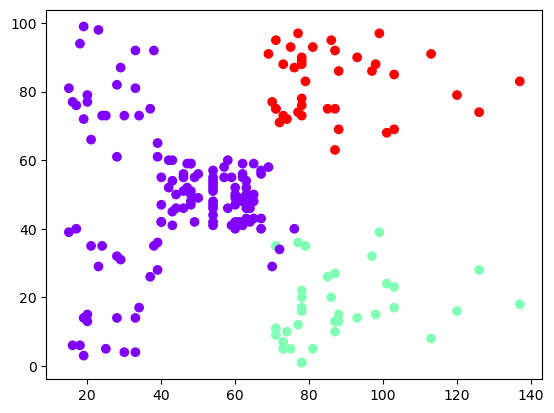

In [135]:
fig, ax = plt.subplots()
plt.scatter(seg_data.iloc[:, 1], seg_data.iloc[:, 2], c=hierarical_clustering.labels_, cmap='rainbow')

# Draw circle for each cluster
"""for label in np.unique(hierarical_clustering.labels_):
    cluster_points = seg_data[seg_data['clust'] == label]
    center = cluster_points.mean(axis=0)
    radius = np.max(np.linalg.norm(cluster_points - center, axis=1))
    
    circle = plt.Circle(center, radius + 0.1, color='black', fill=False, linestyle='--')
    ax.add_patch(circle)

plt.show()"""

In [123]:
mall_data

,custId,Gender,Age,Income,Spend,clust
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,1
197,198,Male,32,126,74,2
198,199,Male,32,137,18,1


In [103]:
scaled_data

array([[-1.42456879, -1.73899919, -0.43480148,  1.12815215],
       [-1.28103541, -1.73899919,  1.19570407,  1.12815215],
       [-1.3528021 , -1.70082976, -1.71591298, -0.88640526],
       [-1.13750203, -1.70082976,  1.04041783, -0.88640526],
       [-0.56336851, -1.66266033, -0.39597992, -0.88640526],
       [-1.20926872, -1.66266033,  1.00159627, -0.88640526],
       [-0.27630176, -1.62449091, -1.71591298, -0.88640526],
       [-1.13750203, -1.62449091,  1.70038436, -0.88640526],
       [ 1.80493225, -1.58632148, -1.83237767,  1.12815215],
       [-0.6351352 , -1.58632148,  0.84631002, -0.88640526],
       [ 2.02023231, -1.58632148, -1.4053405 ,  1.12815215],
       [-0.27630176, -1.58632148,  1.89449216, -0.88640526],
       [ 1.37433211, -1.54815205, -1.36651894, -0.88640526],
       [-1.06573534, -1.54815205,  1.04041783, -0.88640526],
       [-0.13276838, -1.54815205, -1.44416206,  1.12815215],
       [-1.20926872, -1.54815205,  1.11806095,  1.12815215],
       [-0.27630176, -1.

In [107]:
mall_sc_data=pd.DataFrame(scaled_data,columns=seg_data.columns)